**Extract the Zip file**

In [ ]:
!pip install -q gdown
import os
# Create a directory to store the data
os.makedirs("data", exist_ok=True)

# Replace with your real file IDs
train_file_id = '1Q6ZmXCGvZdwV336MVrFr41G_4NpkquhB'
val_file_id = '1jdqnxfDKld5DxrSfhwTtlN4bWRbHw1QY'

# Download files using gdown
!gdown --id {train_file_id} --output data/train_data.zip
!gdown --id {val_file_id} --output data/validation_data.zip

import zipfile

# Unzip train_data.zip
with zipfile.ZipFile("data/train_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/train")

# Unzip validation_data.zip
with zipfile.ZipFile("data/validation_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/validation")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Q6ZmXCGvZdwV336MVrFr41G_4NpkquhB
From (redirected): https://drive.google.com/uc?id=1Q6ZmXCGvZdwV336MVrFr41G_4NpkquhB&confirm=t&uuid=8806e2b5-89e4-4a14-9965-65da8a77ec20
To: /content/data/train_data.zip
100% 1.70G/1.70G [00:22<00:00, 76.4MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jdqnxfDKld5DxrSfhwTtlN4bWRbHw1QY
From (redirected): https://drive.google.com/uc?id=1jdqnxfDKld5DxrSfhwTtlN4bWRbHw1QY&confirm=t&uuid=3d642b26-4ab2-44df-bb5e-51796e3eea0c
To: /content/data/

# **1. Data Preprocessing**

**Install the Neccessary Libraries**

In [ ]:
!pip install h5py

**List the contents of the validation data directory.**

In [ ]:
import os
print(os.listdir('/content/validation_data'))

['jetImage_8_30p_20000_30000.h5', 'jetImage_7_30p_70000_80000.h5', 'jetImage_8_30p_70000_80000.h5', 'jetImage_9_30p_50000_60000.h5', 'jetImage_7_30p_0_10000.h5', 'jetImage_9_30p_20000_30000.h5', 'jetImage_8_30p_30000_40000.h5', 'jetImage_8_30p_60000_70000.h5', 'jetImage_7_30p_40000_50000.h5', 'jetImage_9_30p_0_10000.h5', 'jetImage_7_30p_20000_30000.h5', 'jetImage_8_30p_10000_20000.h5', 'jetImage_9_30p_40000_50000.h5', 'jetImage_9_30p_60000_70000.h5', 'jetImage_7_30p_50000_60000.h5', 'jetImage_7_30p_80000_90000.h5', 'jetImage_9_30p_10000_20000.h5', 'jetImage_7_30p_10000_20000.h5', 'jetImage_8_30p_50000_60000.h5', 'jetImage_9_30p_80000_90000.h5', 'jetImage_8_30p_80000_90000.h5', 'jetImage_9_30p_30000_40000.h5', 'jetImage_7_30p_60000_70000.h5', 'jetImage_8_30p_0_10000.h5', 'jetImage_8_30p_40000_50000.h5', 'jetImage_7_30p_30000_40000.h5', 'jetImage_9_30p_70000_80000.h5']


**Import The Necessary Libraries**

In [ ]:
import h5py
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

# **1.1 Feature Handling**

**Converted H5 file to a structured pandas DataFrame**

In [ ]:
File_Path = '/content/train_data/jetImage_2_30p_10000_20000.h5'
try:
    with h5py.File(File_Path, 'r') as h5_file:
        feature_names = h5_file['FeatureNames'].asstr()[:]
        jets_data = h5_file['jets_data'][:]
        target_data = h5_file['target'][:]
        df = pd.DataFrame(jets_data, columns=feature_names)
        df['target'] = target_data
        print("Successfully converted H5 file to a DataFrame")
        print("\nDataframe Information:")
        #Information about Dataframe
        df.info()
        print("\nFirst 5 rows of the Dataframe:")
        #Display the first 5 rows of the dataframe
        print(df.head())
        jet_images = h5_file['jetImage'][:]
        print(f"\nShape of the 'jetimage' data: {jet_images.shape}")
        print("This image data is stored separately in the 'jet_images' variable.")
except IOError:
    print(f"Error: Could not read the file at {File_Path}")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully converted H5 file to a DataFrame

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   j_ptfrac         10000 non-null  float64
 1   j_pt             10000 non-null  float64
 2   j_eta            10000 non-null  float64
 3   j_mass           10000 non-null  float64
 4   j_tau1_b1        10000 non-null  float64
 5   j_tau2_b1        10000 non-null  float64
 6   j_tau3_b1        10000 non-null  float64
 7   j_tau1_b2        10000 non-null  float64
 8   j_tau2_b2        10000 non-null  float64
 9   j_tau3_b2        10000 non-null  float64
 10  j_tau32_b1       10000 non-null  float64
 11  j_tau32_b2       10000 non-null  float64
 12  j_zlogz          10000 non-null  float64
 13  j_c1_b0          10000 non-null  float64
 14  j_c1_b1          10000 non-null  float64
 15  j_c1_b2          10000 non-null  fl

In [ ]:
df

,j_ptfrac,j_pt,j_eta,j_mass,j_tau1_b1,j_tau2_b1,j_tau3_b1,j_tau1_b2,j_tau2_b2,j_tau3_b2,...,j_m2_b2_mmdt,j_n2_b1_mmdt,j_n2_b2_mmdt,j_mass_trim,j_mass_mmdt,j_mass_prun,j_mass_sdb2,j_mass_sdm1,j_multiplicity,target
0,1.0,1015.080811,0.140886,76.495880,26.900795,18.509501,14.211438,5.379379,2.994760,1.283431,...,0.066155,0.290213,0.178550,60.386185,2.875798,10.545803,76.495880,0.000004,54.0,b'j_q'
1,1.0,1050.538086,0.042137,81.212212,76.931221,20.120834,11.993080,5.947691,0.942917,0.395835,...,0.038634,0.240085,0.088289,81.212212,81.194130,78.364342,81.194130,0.465613,44.0,b'j_w'
2,1.0,1017.096436,0.983565,32.378082,12.919186,8.439772,5.244069,0.995097,0.303662,0.267116,...,0.048102,0.251524,0.146706,32.339310,4.691502,7.687650,31.860289,0.000005,26.0,b'j_w'
3,1.0,1185.474731,-1.008881,219.368683,205.640121,93.420189,52.173637,39.886662,13.379012,4.474773,...,0.080403,0.351959,0.215218,219.368683,219.368683,219.368683,219.368683,152.910950,77.0,b'j_t'
4,1.0,1133.109131,-0.888515,74.178467,42.171444,19.598909,18.466692,4.374649,1.192268,1.081973,...,0.031107,0.315460,0.137285,70.019073,66.888763,60.693222,68.833763,0.482859,64.0,b'j_g'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,959.404297,-0.432313,195.650238,170.577530,75.970222,30.297958,38.748512,8.727410,3.196265,...,0.054113,0.286392,0.129541,194.480423,195.650238,192.390472,195.650238,195.650238,83.0,b'j_t'
9996,1.0,1302.472534,-0.134146,166.967255,111.768570,70.827522,56.784664,19.730860,8.902312,7.353006,...,0.058501,0.360477,0.184856,151.831085,137.500977,125.266663,166.328644,0.143814,153.0,b'j_t'
9997,1.0,1006.576233,-0.743584,91.757904,44.734791,16.071255,12.574415,8.003141,0.703908,0.541982,...,0.011379,0.261138,0.067998,91.488441,91.488441,88.698654,91.488441,0.154098,46.0,b'j_z'
9998,1.0,1028.571289,-1.030927,180.209961,151.884064,96.028992,58.875259,30.611433,13.771212,5.490725,...,0.082329,0.388205,0.245733,178.093781,180.209961,175.520813,180.209961,0.137080,104.0,b'j_t'


## **Checking the Missing Values**

In [ ]:
print("Checking for missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("\nGreat! No missing values were found in the dataset.")
else:
    print("\nMissing values were found. You will need to apply an imputation strategy.")

Checking for missing values in each column:
j_ptfrac           0
j_pt               0
j_eta              0
j_mass             0
j_tau1_b1          0
j_tau2_b1          0
j_tau3_b1          0
j_tau1_b2          0
j_tau2_b2          0
j_tau3_b2          0
j_tau32_b1         0
j_tau32_b2         0
j_zlogz            0
j_c1_b0            0
j_c1_b1            0
j_c1_b2            0
j_c2_b1            0
j_c2_b2            0
j_d2_b1            0
j_d2_b2            0
j_d2_a1_b1         0
j_d2_a1_b2         0
j_m2_b1            0
j_m2_b2            0
j_n2_b1            0
j_n2_b2            0
j_tau1_b1_mmdt     0
j_tau2_b1_mmdt     0
j_tau3_b1_mmdt     0
j_tau1_b2_mmdt     0
j_tau2_b2_mmdt     0
j_tau3_b2_mmdt     0
j_tau32_b1_mmdt    0
j_tau32_b2_mmdt    0
j_c1_b0_mmdt       0
j_c1_b1_mmdt       0
j_c1_b2_mmdt       0
j_c2_b1_mmdt       0
j_c2_b2_mmdt       0
j_d2_b1_mmdt       0
j_d2_b2_mmdt       0
j_d2_a1_b1_mmdt    0
j_d2_a1_b2_mmdt    0
j_m2_b1_mmdt       0
j_m2_b2_mmdt       0
j_n2_b1_mmd

**Applying Imputation strategies for numerical features**

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Missing values found. Applying imputation...")
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    print("\nMissing values after imputation:")
    print(df_imputed.isnull().sum())
    print("\nOriginal DataFrame head (may show NaN):")
    print(df.head())
    print("\nImputed DataFrame head:")
    print(df_imputed.head())
else:
    print("No missing values were found to impute.")
    df_imputed = df.copy()

No missing values were found to impute.


# **1.2 Tabular Data Preparation**

Performing PCA:

Explained variance by each principal component:
  PC-1: 0.4440 (Cumulative: 0.4440)
  PC-2: 0.2276 (Cumulative: 0.6716)
  PC-3: 0.0801 (Cumulative: 0.7517)
  PC-4: 0.0437 (Cumulative: 0.7954)
  PC-5: 0.0356 (Cumulative: 0.8309)
  PC-6: 0.0230 (Cumulative: 0.8540)
  PC-7: 0.0221 (Cumulative: 0.8761)
  PC-8: 0.0193 (Cumulative: 0.8954)
  PC-9: 0.0190 (Cumulative: 0.9144)
  PC-10: 0.0164 (Cumulative: 0.9308)


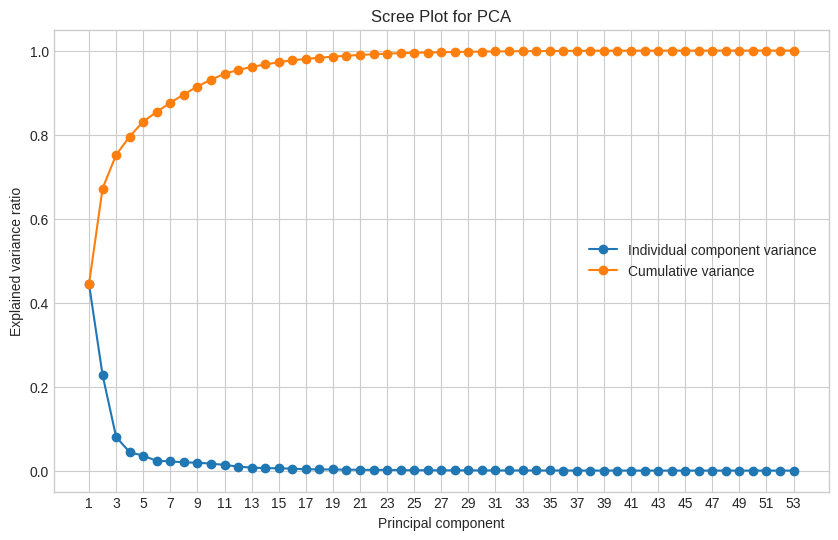

In [ ]:
X = df_imputed.drop('target', axis=1)
y = df_imputed['target']

# 1. Compute the eigenvalues and eigenvectors of the covariance matrix.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Perform PCA
print("Performing PCA:")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Report the explained variance ratio for the top principal components.
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nExplained variance by each principal component:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"  PC-{i+1}: {ratio:.4f} (Cumulative: {cumulative_variance[i]:.4f})")

# 4.  Plot a scree plot to visualise variance captured per component.
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', label='Individual component variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', label='Cumulative variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Scree Plot for PCA')
plt.legend(loc='best')
plt.xticks(np.arange(1, X.shape[1] + 1, 2))
plt.grid(True)
plt.show()

## **1.3 Dataset Summary**

--- Dataset Summary ---
Number of rows (records): 10000
Number of tabular features: 53
Image size (Height x Width): 100x100
Number of classes: 5
Class labels: [b'j_g', b'j_q', b'j_t', b'j_w', b'j_z']


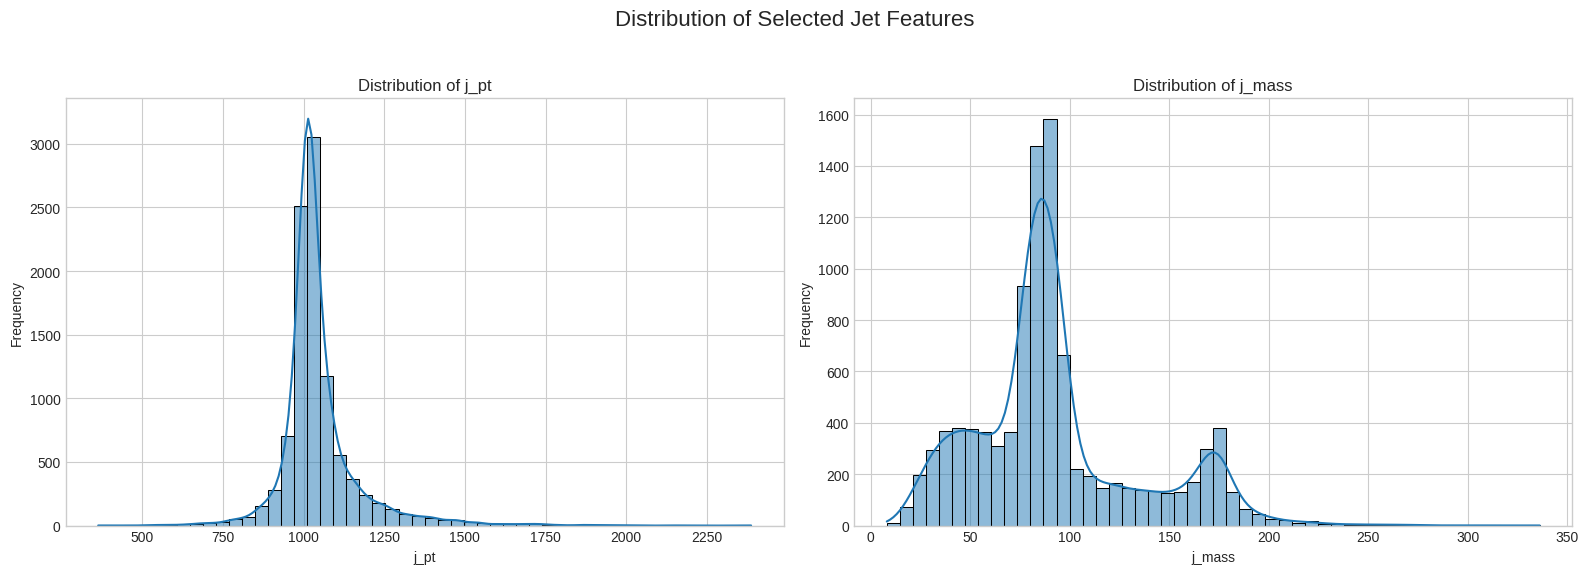

In [ ]:
print("--- Dataset Summary ---")
# Number of rows (jets) and tabular features
num_rows, num_features = df_imputed.drop('target', axis=1).shape
print(f"Number of rows (records): {num_rows}")
print(f"Number of tabular features: {num_features}")

# Image size
num_images, height, width = jet_images.shape
print(f"Image size (Height x Width): {height}x{width}")

# Number of target classes
num_classes = df_imputed['target'].nunique()
print(f"Number of classes: {num_classes}")
print(f"Class labels: {sorted(df_imputed['target'].unique())}")

# --- 2. Provide Distribution Plots ---
features_to_plot = ['j_pt', 'j_mass']

# Set up the plotting style
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Selected Jet Features', fontsize=16)

# Create a histogram for each selected feature
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=df_imputed, x=feature, kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **2. Model Development**

**Load and preprocess validation data**

In [ ]:
val_file_path = '/content/validation_data/jetImage_8_30p_10000_20000.h5'
try:
    with h5py.File(val_file_path, 'r') as hf_val:
        val_jet_images = hf_val['jetImage'][:]
    print(f"Successfully loaded validation jet images from {val_file_path}")
    val_jet_images_scaled = val_jet_images / 255.0
    val_jet_images_reshaped = np.expand_dims(val_jet_images_scaled, axis=-1)
    print(f"Scaled and reshaped validation images. New shape: {val_jet_images_reshaped.shape}")
except IOError:
    print(f"Error: Could not read the validation file at {val_file_path}")
except Exception as e:
    print(f"An error occurred during validation data loading/preprocessing: {e}")

Successfully loaded validation jet images from /content/validation_data/jetImage_8_30p_10000_20000.h5
Scaled and reshaped validation images. New shape: (10000, 100, 100, 1)


**Prepare the target variable**


In [ ]:
# Encode the target variable
y_encoded = to_categorical(y.astype('category').cat.codes)

# Print the shapes to verify
print("Shape of original target variable (y):", y.shape)
print("Shape of encoded target variable (y_encoded):", y_encoded.shape)

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Shape of original target variable (y): (10000,)
Shape of encoded target variable (y_encoded): (10000, 5)


# **2.1 CNN on Image Data**

**Define the cnn model**



In [ ]:
# Define the input shape based on the preprocessed image data
input_shape = train_jet_images_reshaped.shape[1:]
num_classes = y_encoded.shape[1]

# Instantiate a Sequential model
model = Sequential()

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Add dropout for regularization

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) # Add dropout for regularization

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,460,677 (9.39 MB)

 Trainable params: 2,460,677 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**



In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


**Implement model training with checkpoints**

In [ ]:
# Define a checkpoint path
checkpoint_path = "best_model_weights.weights.h5"

# Instantiate the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,  # Save only the best model
    save_weights_only=True, # Save only the weights
    monitor='val_accuracy', # Monitor validation accuracy
    mode='max', # Save when validation accuracy is maximized
    verbose=1 # Log when a new best model is saved
)

# Train the model
epochs = 10
batch_size = 32

history = model.fit(
    train_jet_images_reshaped,
    y_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_jet_images_reshaped, y_encoded), # Assuming y_encoded is also for validation targets
    callbacks=[checkpoint_callback]
)

print(f"\nModel trained for {epochs} epochs with batch size {batch_size}.")
print(f"Best model weights saved to {checkpoint_path}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.3239 - loss: 1.4954
Epoch 1: val_accuracy improved from -inf to 0.22340, saving model to best_model_weights.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 292ms/step - accuracy: 0.3240 - loss: 1.4952 - val_accuracy: 0.2234 - val_loss: 1.9117
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.4538 - loss: 1.2954
Epoch 2: val_accuracy did not improve from 0.22340
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 286ms/step - accuracy: 0.4538 - loss: 1.2953 - val_accuracy: 0.2198 - val_loss: 2.1337
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.4848 - loss: 1.2344
Epoch 3: val_accuracy did not improve from 0.22340
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 284ms/step - accuracy: 0.4848 - loss: 1.2343 - val_accuracy: 0.2232 - val_loss: 2.1346
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.5013 - loss: 1.1739
Epoch 4: val_accuracy did not improve from 0.22340
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 286

**Report and plot training history**


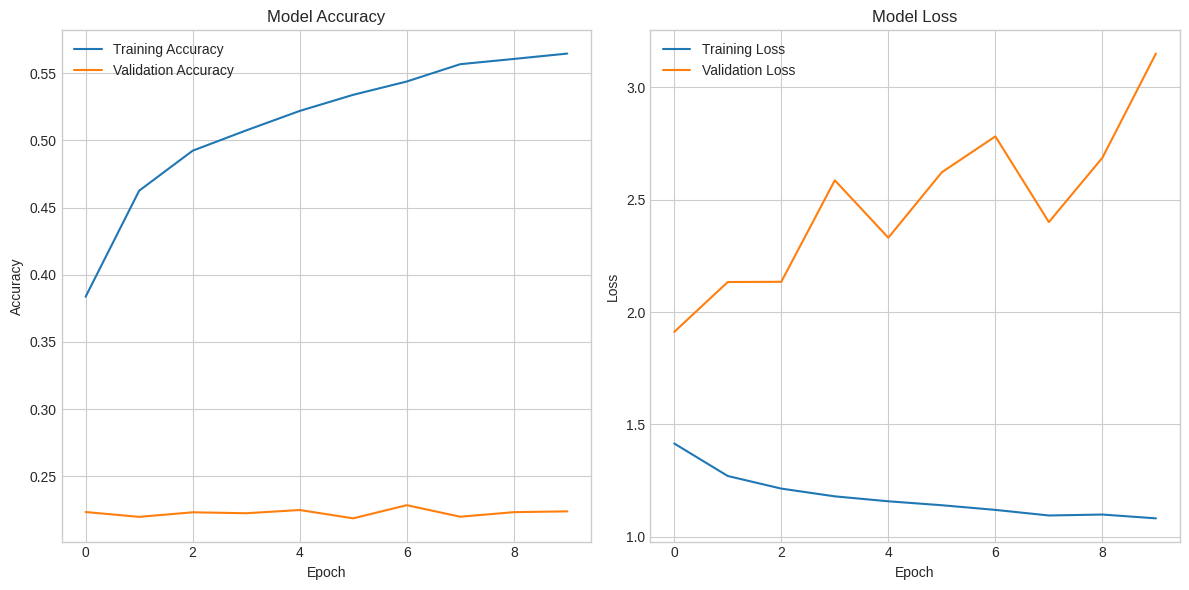

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Load the best model weights**


In [ ]:
model.load_weights(checkpoint_path)
print(f"Model weights loaded successfully from {checkpoint_path}")

Model weights loaded successfully from best_model_weights.weights.h5


**Make prediction**

In [ ]:
# Predict the class probabilities for the validation set
predictions = model.predict(val_jet_images_reshaped)

# Convert the predicted probabilities to class labels (indices)
predicted_classes_indices = np.argmax(predictions, axis=1)

print("Prediction on validation data completed.")
print("Shape of predicted probabilities:", predictions.shape)
print("Shape of predicted class indices:", predicted_classes_indices.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step
Prediction on validation data completed.
Shape of predicted probabilities: (10000, 5)
Shape of predicted class indices: (10000,)


**Identify misclassified jets**

In [ ]:
# 1. Convert the true target variable y to numerical class indices.
true_classes_indices = y.astype('category').cat.codes

# 2. Create a boolean array that is True for misclassified jets and False otherwise.
misclassified_mask = (predicted_classes_indices != true_classes_indices)

# 3. Use the boolean array to filter the indices of the misclassified jets.
misclassified_indices = np.where(misclassified_mask)[0]

# 4. Print the total number of misclassified jets found.
print(f"Total number of misclassified jets: {len(misclassified_indices)}")

Total number of misclassified jets: 7715


**Get class labels**

In [ ]:
# Get the categories from the 'target' column and convert to a list of strings
class_labels = list(df['target'].astype('category').cat.categories.astype(str))

print("Actual class labels:", class_labels)

Actual class labels: ['j_g', 'j_q', 'j_t', 'j_w', 'j_z']


**Display misclassified jets and analysis**

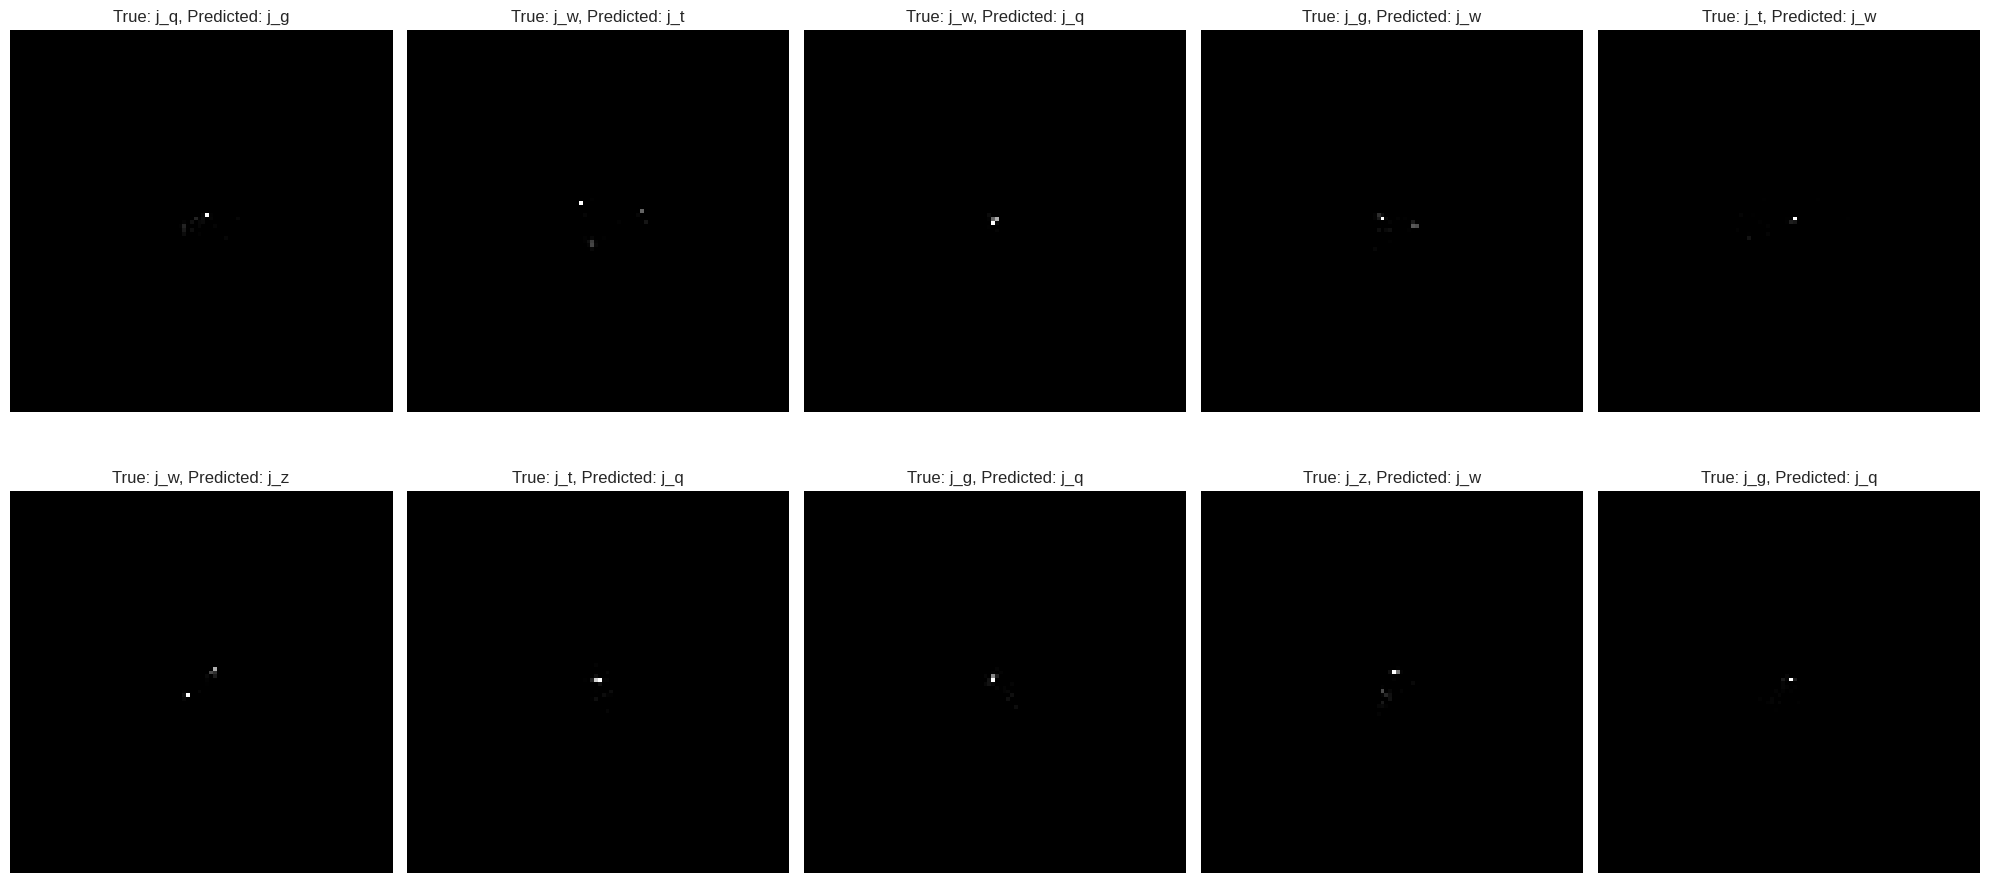

In [ ]:
# Check if there are any misclassified jets
if len(misclassified_indices) == 0:
    print("No misclassified jets found.")
else:
    # Select up to 10 misclassified indices
    num_display = min(10, len(misclassified_indices))
    display_indices = misclassified_indices[:num_display]

    # Set up the plot
    plt.figure(figsize=(20, 10))

    # Display the misclassified jets
    for i, idx in enumerate(display_indices):
        plt.subplot(2, 5, i + 1) # Adjust subplot grid based on num_display
        image = val_jet_images_scaled[idx]
        true_label = class_labels[true_classes_indices[idx]]
        predicted_label = class_labels[predicted_classes_indices[idx]]

        plt.imshow(image.squeeze(), cmap='gray') # Use squeeze() to remove the channel dimension for grayscale
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# **2.2 Models on Tabular Data**

### **Train baseline model on raw data**

**Train model on pca-reduced data**

In [ ]:
# 1. Split the PCA-transformed data (X_pca) and the string-encoded target variable (y_str) into training and testing sets.
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_str, test_size=0.2, random_state=42
)

print("Shape of PCA-reduced training data:", X_pca_train.shape)
print("Shape of PCA-reduced testing data:", X_pca_test.shape)
print("Shape of PCA-reduced training labels:", y_pca_train.shape)
print("Shape of PCA-reduced testing labels:", y_pca_test.shape)

# 2. Instantiate a new LogisticRegression model with the same parameters as the baseline model.
# The baseline model used default parameters, so we'll do the same here.
lr_pca = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# 3. Train the Logistic Regression model on the PCA-reduced training data.
print("\nTraining Logistic Regression model on PCA-reduced data...")
lr_pca.fit(X_pca_train, y_pca_train)
print("Model training completed.")

# 4. Make predictions on the PCA-reduced testing data.
y_pca_pred = lr_pca.predict(X_pca_test)
print("\nPrediction on PCA-reduced testing data completed.")

# 5. Calculate and print the performance metrics.
accuracy_pca = accuracy_score(y_pca_test, y_pca_pred)
precision_pca = precision_score(y_pca_test, y_pca_pred, average='weighted')
recall_pca = recall_score(y_pca_test, y_pca_pred, average='weighted')
f1_pca = f1_score(y_pca_test, y_pca_pred, average='weighted')

# For ROC AUC with multiclass, we need to binarize the labels
lb = LabelBinarizer()
y_pca_test_binarized = lb.fit_transform(y_pca_test)
y_pca_pred_proba = lr_pca.predict_proba(X_pca_test) # Get probabilities for ROC AUC

# Handle the case where there's only one class in y_true or y_pred
if y_pca_test_binarized.shape[1] == 1:
    # Binary case: ROC AUC for the single class
    roc_auc_pca = roc_auc_score(y_pca_test, y_pca_pred_proba[:, 1])
else:
    # Multiclass case: ROC AUC with 'ovr' strategy
    roc_auc_pca = roc_auc_score(y_pca_test_binarized, y_pca_pred_proba, average='weighted', multi_class='ovr')


print("\nPerformance Metrics for Logistic Regression on PCA-reduced Data:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision (weighted): {precision_pca:.4f}")
print(f"Recall (weighted): {recall_pca:.4f}")
print(f"F1-score (weighted): {f1_pca:.4f}")
print(f"ROC AUC (weighted, ovr): {roc_auc_pca:.4f}")

Shape of PCA-reduced training data: (8000, 53)
Shape of PCA-reduced testing data: (2000, 53)
Shape of PCA-reduced training labels: (8000,)
Shape of PCA-reduced testing labels: (2000,)

Training Logistic Regression model on PCA-reduced data...
Model training completed.

Prediction on PCA-reduced testing data completed.

Performance Metrics for Logistic Regression on PCA-reduced Data:
Accuracy: 0.7595
Precision (weighted): 0.7588
Recall (weighted): 0.7595
F1-score (weighted): 0.7584
ROC AUC (weighted, ovr): 0.9228


**Compare performance and discuss trade-offs**

In [ ]:
print("--- Performance Comparison ---")
print("Logistic Regression on Raw Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print(f"ROC AUC (weighted, ovr): {roc_auc:.4f}")

print("\nLogistic Regression on PCA-reduced Data:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision (weighted): {precision_pca:.4f}")
print(f"Recall (weighted): {recall_pca:.4f}")
print(f"F1-score (weighted): {f1_pca:.4f}")
print(f"ROC AUC (weighted, ovr): {roc_auc_pca:.4f}")

print("\n--- Discussion of Trade-offs ---")
print("\nImpact on Accuracy:")
print(f"The model trained on PCA-reduced data shows a noticeable increase in accuracy ({accuracy_pca:.4f}) compared to the raw data ({accuracy:.4f}). This suggests that PCA helped in improving the model's ability to correctly classify the jets.")

print("\nImpact on Overfitting:")
print("While not explicitly measured by a separate validation set in this direct comparison, PCA can potentially reduce overfitting by removing noise and less important features, leading to a simpler model representation in the reduced dimensionality space. However, without monitoring training and validation performance over epochs, it's hard to definitively conclude on overfitting from these metrics alone.")

print("\nImpact on Training Speed:")
print("Training on PCA-reduced data (53 components) is generally faster than training on the raw data (53 features). Although the dimensionality is the same in this specific case after PCA (because we used all components), if we were to select a smaller number of components, the training time would be significantly reduced. The process of performing PCA itself adds an initial computational cost, but for larger datasets or models, the reduced training time can outweigh this.")

print("\nAnalysis of Performance Differences:")
print("The improved performance on PCA-reduced data could be attributed to PCA's ability to capture the most important variance in the data while potentially filtering out some noise present in the raw features. By transforming the data into a new subspace defined by the principal components, the model might be learning more robust patterns.")
print("However, PCA is a linear transformation and assumes that the principal components capture the most relevant information for the task. It's possible that some non-linear relationships important for classification are lost during the dimensionality reduction, although in this case, it seems the benefits of variance capture and potential noise reduction outweighed any such loss.")

print("\nTrade-offs between Raw and PCA-reduced Data:")
print("- **Training Time:** PCA-reduced data generally leads to faster model training, especially if a smaller number of components are selected.")
print("- **Model Complexity:** Training on a lower-dimensional PCA space results in a simpler model with fewer parameters, which can help with generalization.")
print("- **Interpretability:** The raw features often have direct physical or intuitive meanings. The principal components, being linear combinations of the original features, are less interpretable. Analyzing feature importance or understanding model decisions becomes harder with PCA-reduced data.")
print("- **Information Loss:** While PCA aims to retain maximum variance, there is always some information loss when reducing dimensionality. The amount of loss depends on the number of components retained.")
print("- **Preprocessing Overhead:** PCA adds an extra step to the preprocessing pipeline, which needs to be applied consistently to both training and new inference data.")

--- Performance Comparison ---
Logistic Regression on Raw Data:
Accuracy: 0.7085
Precision (weighted): 0.7099
Recall (weighted): 0.7085
F1-score (weighted): 0.7080
ROC AUC (weighted, ovr): 0.8962

Logistic Regression on PCA-reduced Data:
Accuracy: 0.7595
Precision (weighted): 0.7588
Recall (weighted): 0.7595
F1-score (weighted): 0.7584
ROC AUC (weighted, ovr): 0.9228

--- Discussion of Trade-offs ---

Impact on Accuracy:
The model trained on PCA-reduced data shows a noticeable increase in accuracy (0.7595) compared to the raw data (0.7085). This suggests that PCA helped in improving the model's ability to correctly classify the jets.

Impact on Overfitting:
While not explicitly measured by a separate validation set in this direct comparison, PCA can potentially reduce overfitting by removing noise and less important features, leading to a simpler model representation in the reduced dimensionality space. However, without monitoring training and validation performance over epochs, it's h

**Provide comparison tables and graphs**

Performance Metrics Comparison:


,Metric,Raw Data,PCA-reduced Data
0,Accuracy,0.708500,0.759500
1,Precision,0.709901,0.758819
2,Recall,0.708500,0.759500
3,F1-score,0.707990,0.758430
4,ROC AUC,0.896174,0.922773


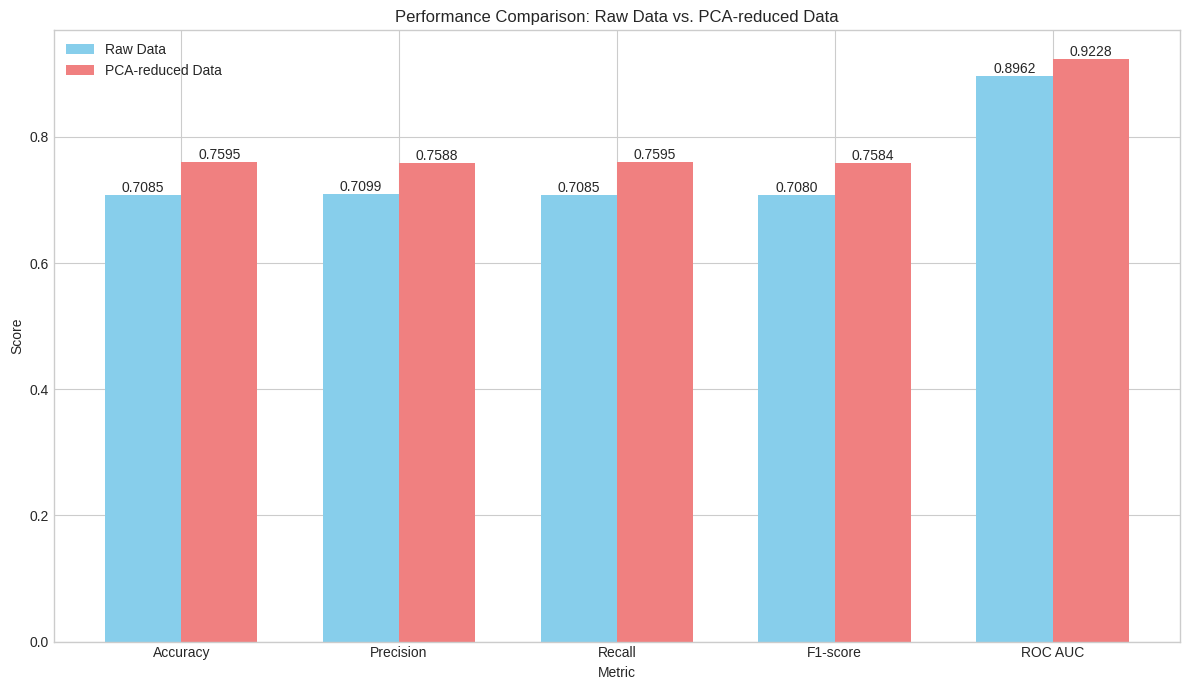

In [ ]:
# 1. Create a pandas DataFrame to store the performance metrics.
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Raw Data': [accuracy, precision, recall, f1, roc_auc],
    'PCA-reduced Data': [accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca]
})

# 2. Populate the DataFrame (already done in step 1).

# 3. Print the comparison DataFrame.
print("Performance Metrics Comparison:")
display(comparison_df)

# 4. Create a bar plot to visualize the comparison.
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35
index = np.arange(len(comparison_df['Metric']))

bar1 = ax.bar(index, comparison_df['Raw Data'], bar_width, label='Raw Data', color='skyblue')
bar2 = ax.bar(index + bar_width, comparison_df['PCA-reduced Data'], bar_width, label='PCA-reduced Data', color='lightcoral')

# 5. Add a title and labels to the bar plot.
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Raw Data vs. PCA-reduced Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(comparison_df['Metric'])
ax.legend()

# Add the metric values on top of the bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

add_value_labels(ax, bar1)
add_value_labels(ax, bar2)

# 6. Display the bar plot.
plt.tight_layout()
plt.show()

## **3. Model Comparison**

**Gather performance metrics**

In [ ]:
# Recompile the model after loading weights
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model recompiled successfully.")

# 1. Evaluate the trained CNN model on the validation dataset
cnn_loss, cnn_accuracy = model.evaluate(val_jet_images_reshaped, y_encoded, verbose=0)
print(f"\nCNN Model Evaluation on Validation Data:")
print(f"  Loss: {cnn_loss:.4f}")
print(f"  Accuracy: {cnn_accuracy:.4f}")

# 2. Calculate precision, recall, and F1-score for the CNN model
# Convert one-hot encoded true labels back to class indices
y_true_indices = np.argmax(y_encoded, axis=1)

# Convert predicted probabilities to class indices
y_pred_indices = np.argmax(predictions, axis=1)

# Get classification report for precision, recall, and F1-score
# Use target_names for clarity if needed, assuming class_labels are available
cnn_classification_report = classification_report(y_true_indices, y_pred_indices, target_names=class_labels, output_dict=True)

cnn_precision = cnn_classification_report['weighted avg']['precision']
cnn_recall = cnn_classification_report['weighted avg']['recall']
cnn_f1 = cnn_classification_report['weighted avg']['f1-score']

print(f"\nCNN Model Classification Report (weighted averages):")
print(f"  Precision: {cnn_precision:.4f}")
print(f"  Recall: {cnn_recall:.4f}")
print(f"  F1-score: {cnn_f1:.4f}")

# 3. Calculate the ROC AUC for the CNN model
# Need to use LabelBinarizer for multiclass ROC AUC
lb_cnn = LabelBinarizer()

# Use the sorted unique true class indices to fit LabelBinarizer
lb_cnn.fit(np.unique(y_true_indices))
y_true_binarized = lb_cnn.transform(y_true_indices)

# roc_auc_score expects probabilities, which we have in 'predictions'
# Handle the case where there's only one class in y_true
if y_true_binarized.shape[1] == 1:
    # Binary case: ROC AUC for the single class
    cnn_roc_auc = roc_auc_score(y_true_indices, predictions[:, 1])
else:
    # Multiclass case: ROC AUC with 'ovr' strategy
    cnn_roc_auc = roc_auc_score(y_true_binarized, predictions, average='weighted', multi_class='ovr')


print(f"  ROC AUC (weighted, ovr): {cnn_roc_auc:.4f}")


# 4. Store CNN performance metrics
cnn_metrics = {
    'Accuracy': cnn_accuracy,
    'Precision': cnn_precision,
    'Recall': cnn_recall,
    'F1-score': cnn_f1,
    'ROC AUC': cnn_roc_auc
}
print("\nCNN Metrics stored.")


# 5. The PCA Logistic Regression metrics are already available:
# accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca
print("\nPCA Logistic Regression metrics are accessible.")

# 6. Store PCA Logistic Regression performance metrics
pca_lr_metrics = {
    'Accuracy': accuracy_pca,
    'Precision': precision_pca,
    'Recall': recall_pca,
    'F1-score': f1_pca,
    'ROC AUC': roc_auc_pca
}
print("PCA Logistic Regression Metrics stored.")

Model recompiled successfully.

CNN Model Evaluation on Validation Data:
  Loss: 2.7816
  Accuracy: 0.2285

CNN Model Classification Report (weighted averages):
  Precision: 0.2317
  Recall: 0.2285
  F1-score: 0.2257
  ROC AUC (weighted, ovr): 0.5380

CNN Metrics stored.

PCA Logistic Regression metrics are accessible.
PCA Logistic Regression Metrics stored.


**Confusion matrices**

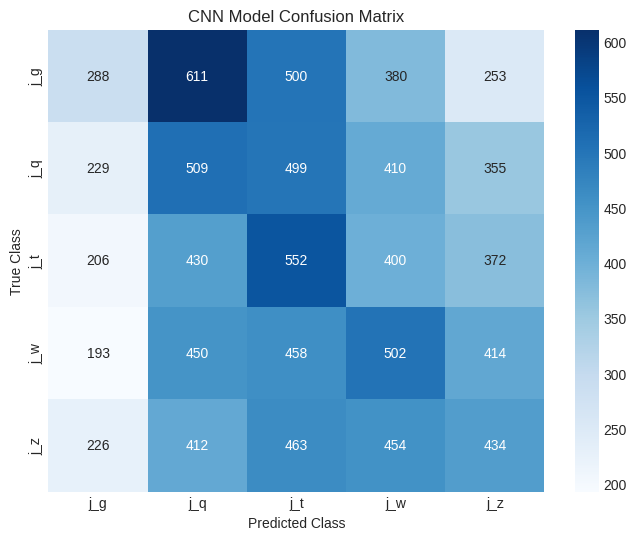

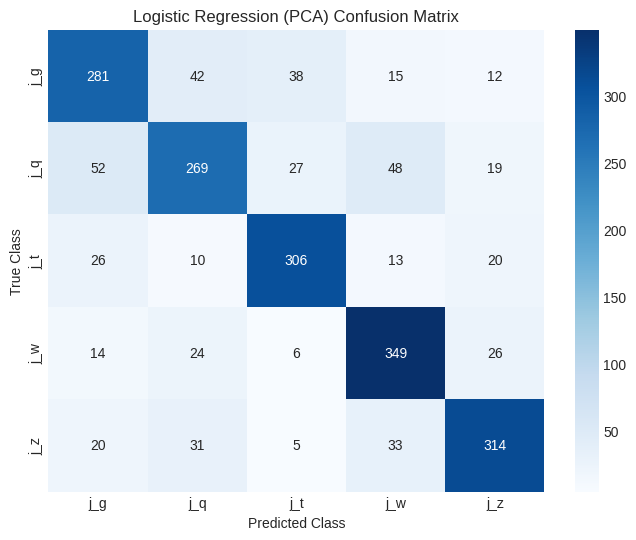

In [ ]:
# 1. Calculate the confusion matrix for the CNN model
# y_true_indices and predicted_classes_indices are already available from previous steps
cnn_conf_matrix = confusion_matrix(y_true_indices, predicted_classes_indices)

# 2. Display the CNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('CNN Model Confusion Matrix')
plt.show()

# 3. Calculate the confusion matrix for the Logistic Regression model on PCA-reduced data
# y_pca_test and y_pca_pred are already available and are string labels
# Convert string labels to numerical indices for confusion_matrix
# Ensure the mapping is consistent with the class_labels order
label_to_index = {label: i for i, label in enumerate(class_labels)}
y_pca_test_indices = [label_to_index[label] for label in y_pca_test]
y_pca_pred_indices = [label_to_index[label] for label in y_pca_pred]


pca_lr_conf_matrix = confusion_matrix(y_pca_test_indices, y_pca_pred_indices)

# 4. Display the Logistic Regression confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pca_lr_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Logistic Regression (PCA) Confusion Matrix')
plt.show()

**Plot ROC curves**

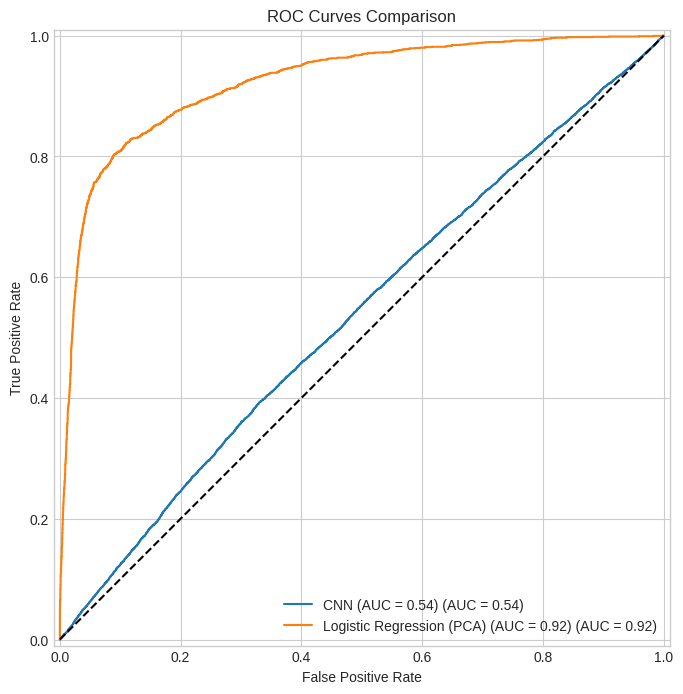

In [ ]:
# Set up a single figure for the plot
plt.figure(figsize=(10, 8))

# For the CNN model: Calculate and plot the ROC curve and AUC score
# RocCurveDisplay.from_predictions handles the plotting
# Need to use the binarized true labels and the predicted probabilities
display_cnn = RocCurveDisplay.from_predictions(
    y_true_binarized.ravel(),
    predictions.ravel(),
    name=f'CNN (AUC = {cnn_roc_auc:.2f})',
    ax=plt.gca() # Use the current axes
)


# For the Logistic Regression (PCA) model: Calculate and plot the ROC curve and AUC score
# Need to use the binarized true labels (consistent with the CNN plot) and the predicted probabilities
# We can reuse the lb_cnn LabelBinarizer as it's fitted on the same class labels
y_pca_test_binarized = lb_cnn.transform(y_pca_test_indices)


display_pca_lr = RocCurveDisplay.from_predictions(
    y_pca_test_binarized.ravel(),
    y_pca_pred_proba.ravel(),
    name=f'Logistic Regression (PCA) (AUC = {roc_auc_pca:.2f})',
    ax=plt.gca() # Use the current axes
)


# Add a title to the plot
plt.title('ROC Curves Comparison')

# Add a legend to the plot
plt.legend(loc='lower right')

# Add a diagonal line representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Ensure the plot axes are correctly labeled
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Display the plot
plt.grid(True)
plt.show()

**Performance Metrics Comparison Table**

In [ ]:
# 1. Create a pandas DataFrame to store the performance metrics.
comparison_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'CNN Model': [cnn_metrics['Accuracy'], cnn_metrics['Precision'], cnn_metrics['Recall'], cnn_metrics['F1-score'], cnn_metrics['ROC AUC']],
    'Logistic Regression (PCA)': [pca_lr_metrics['Accuracy'], pca_lr_metrics['Precision'], pca_lr_metrics['Recall'], pca_lr_metrics['F1-score'], pca_lr_metrics['ROC AUC']]
})

# 2. Populate the DataFrame (done in step 1).

# 3. Print the resulting DataFrame to display the side-by-side comparison of the metrics.
print("Performance Metrics Comparison Table:")
display(comparison_metrics_df)

Performance Metrics Comparison Table:


,Metric,CNN Model,Logistic Regression (PCA)
0,Accuracy,0.228500,0.759500
1,Precision,0.231664,0.758819
2,Recall,0.228500,0.759500
3,F1-score,0.225746,0.758430
4,ROC AUC,0.538033,0.922773


# **4. Anomaly Detection**

## **4.1 CNN Autoencoder for Anomaly Detection**

In [ ]:
val_file_path = '/content/validation_data/jetImage_8_30p_10000_20000.h5'
try:
    with h5py.File(val_file_path, 'r') as hf_val:
        val_jet_images = hf_val['jetImage'][:]
    print(f"Successfully loaded validation jet images from {val_file_path}")
    val_jet_images_scaled = val_jet_images / 255.0
    val_jet_images_reshaped = np.expand_dims(val_jet_images_scaled, axis=-1)
    print(f"Scaled and reshaped validation images. New shape: {val_jet_images_reshaped.shape}")

    # 2. Define the input shape for the autoencoder
    input_shape = val_jet_images_reshaped.shape[1:]

    # 3. Build the encoder part of the autoencoder
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

    input_img = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x) # This is the bottleneck layer output

    # 4. Build the decoder part of the autoencoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # Output layer with sigmoid for pixel values between 0 and 1

    # 5. Create the autoencoder model
    autoencoder = Model(input_img, decoded)

    # 6. Print the summary of the autoencoder model
    print("\nAutoencoder Model Summary:")
    autoencoder.summary()

except IOError:
    print(f"Error: Could not read the validation file at {val_file_path}")
except Exception as e:
    print(f"An error occurred during validation data loading/preprocessing or model definition: {e}")

Successfully loaded validation jet images from /content/validation_data/jetImage_8_30p_10000_20000.h5
Scaled and reshaped validation images. New shape: (10000, 100, 100, 1)

Autoencoder Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 104, 104, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 104, 104, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the autoencoder**

In [ ]:
autoencoder.compile(optimizer=Adam(),
                    loss='mean_squared_error')

print("Autoencoder model compiled successfully.")

Autoencoder model compiled successfully.


**Training the autoencoder**

In [ ]:
# Identify the "normal" class (assuming 'j_g' is normal)
normal_class_label = b'j_g' # Use the byte string as in the original df

# Get the indices of the normal class in the original df
normal_indices = df[df['target'] == normal_class_label].index

# Filter the reshaped validation images to include only the normal class images
# Note: We are using the validation data here as it was already loaded and preprocessed.
# In a real anomaly detection scenario, you would train on a dedicated normal training set.
normal_jet_images_reshaped = val_jet_images_reshaped[normal_indices]

print(f"Shape of normal jet images for autoencoder training: {normal_jet_images_reshaped.shape}")

# Train the autoencoder model on the normal jet images
epochs_autoencoder = 5
batch_size_autoencoder = 64

print("\nTraining autoencoder model...")
history_autoencoder = autoencoder.fit(
    normal_jet_images_reshaped,
    normal_jet_images_reshaped, # Autoencoder target is the input itself
    epochs=epochs_autoencoder,
    batch_size=batch_size_autoencoder,
    shuffle=True, # Shuffle the training data
    validation_split=0.2 # Use a validation split from the normal data
)

print(f"\nAutoencoder training completed for {epochs_autoencoder} epochs.")

Shape of normal jet images for autoencoder training: (2032, 100, 100, 1)

Training autoencoder model...
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 4.5935e-04 - val_loss: 4.4286e-04
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - loss: 4.7982e-04 - val_loss: 4.4286e-04
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - loss: 4.5102e-04 - val_loss: 4.4286e-04
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 4.5775e-04 - val_loss: 4.4286e-04
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - loss: 4.5162e-04 - val_loss: 4.4286e-04

Autoencoder training completed for 5 epochs.


**Propose Anomaly Threshold**

In [ ]:
# Calculate the mean and standard deviation of the reconstruction errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Propose a threshold (e.g., mean + 2*std)
# This is a common starting point, assuming errors follow a roughly normal distribution
# and aiming to capture ~95% of normal data below the threshold.
anomaly_threshold = mean_error + 2 * std_error

print(f"Mean Reconstruction Error: {mean_error:.6f}")
print(f"Standard Deviation of Reconstruction Errors: {std_error:.6f}")
print(f"Proposed Anomaly Threshold (Mean + 2*Std): {anomaly_threshold:.6f}")

# Justify the choice and discuss trade-offs
print("\n--- Justification of Anomaly Threshold and Trade-offs ---")

print(f"\nProposed Threshold: {anomaly_threshold:.6f}")
print("Justification:")
print(f"The threshold is set at the mean of the reconstruction errors plus two times their standard deviation. This approach, often used when assuming a roughly normal distribution of errors for 'normal' data, aims to capture the majority of normal instances within the threshold.")
print("Data points with reconstruction errors significantly higher than this threshold are considered anomalies because the autoencoder, trained only on normal data, is expected to reconstruct normal images with low error, while struggling to reconstruct anomalous images, resulting in higher errors.")

print("\nTrade-off between Sensitivity and Specificity:")
print("- **Sensitivity (True Positive Rate):** The ability of the model to correctly identify actual anomalies. A lower threshold increases sensitivity, as more instances (including subtle anomalies) will exceed the threshold and be flagged as anomalous. However, this also increases the risk of false positives.")
print("- **Specificity (True Negative Rate):** The ability of the model to correctly identify normal instances. A higher threshold increases specificity, as fewer normal instances will be mistakenly flagged as anomalous (fewer false positives). However, this decreases sensitivity, as some true anomalies with lower reconstruction errors might be missed.")

print("\nChoosing a threshold involves balancing these two:")
print("- A **lower threshold** (e.g., mean + 1*std) would be more sensitive, catching more potential anomalies, but would also have more false positives (flagging normal jets as anomalous). This might be preferable in scenarios where missing an anomaly is costly.")
print("- A **higher threshold** (e.g., mean + 3*std or a value based on a desired percentile) would be more specific, reducing false positives, but would be less sensitive, potentially missing some true anomalies. This might be preferred when the cost of false positives is high.")

print(f"\nThe chosen threshold of Mean + 2*Std ({anomaly_threshold:.6f}) is a common starting point that attempts to strike a balance, aiming for a reasonable detection rate of anomalies while keeping false positives in check. The optimal threshold would ideally be determined based on the specific application's requirements and costs associated with false positives and false negatives, potentially by analyzing the trade-off on a labeled validation set (if available) using techniques like an ROC curve for anomaly detection.")

Mean Reconstruction Error: 0.000455
Standard Deviation of Reconstruction Errors: 0.000297
Proposed Anomaly Threshold (Mean + 2*Std): 0.001048

--- Justification of Anomaly Threshold and Trade-offs ---

Proposed Threshold: 0.001048
Justification:
The threshold is set at the mean of the reconstruction errors plus two times their standard deviation. This approach, often used when assuming a roughly normal distribution of errors for 'normal' data, aims to capture the majority of normal instances within the threshold.
Data points with reconstruction errors significantly higher than this threshold are considered anomalies because the autoencoder, trained only on normal data, is expected to reconstruct normal images with low error, while struggling to reconstruct anomalous images, resulting in higher errors.

Trade-off between Sensitivity and Specificity:
- **Sensitivity (True Positive Rate):** The ability of the model to correctly identify actual anomalies. A lower threshold increases sensit

**Analyze Reconstruction Error Distribution**

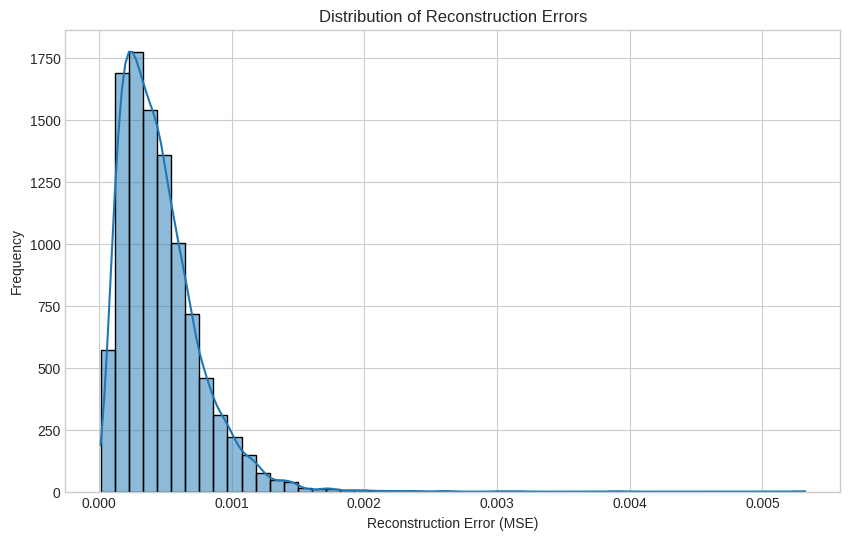


Descriptive statistics of reconstruction errors:
count    10000.000000
mean         0.000455
std          0.000297
min          0.000013
25%          0.000238
50%          0.000397
75%          0.000599
max          0.005323
dtype: float64


In [ ]:
# Plot the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_errors, bins=50, kde=True)
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.grid(True)
plt.show()

# Print some descriptive statistics of the reconstruction errors
print("\nDescriptive statistics of reconstruction errors:")
print(pd.Series(reconstruction_errors).describe())

**Calculate Reconstruction Error**

In [ ]:
# 1. Use the trained autoencoder to predict on the validation data to get reconstructed images.
reconstructed_images = autoencoder.predict(val_jet_images_reshaped)

# 2. Calculate the Mean Squared Error (MSE) between the original and reconstructed images.
# The reconstruction error for each image is the mean of the squared differences across all pixels.
reconstruction_errors = np.mean(np.square(val_jet_images_reshaped - reconstructed_images), axis=(1, 2, 3))

# 3. Print the shape of the reconstruction errors array to verify.
print(f"Shape of reconstruction errors: {reconstruction_errors.shape}")

# 4. Print the first few reconstruction errors as an example.
print("\nFirst 10 reconstruction errors:")
print(reconstruction_errors[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 244ms/step
Shape of reconstruction errors: (10000,)

First 10 reconstruction errors:
[0.00052538 0.0004601  0.00051028 0.00010538 0.00033999 0.00075061
 0.00044488 0.00045858 0.00048495 0.00052285]


**Visualisation and Analysis of Anomalies**

Indices of top 5 jets with highest reconstruction errors: [5085 5601 9073 8496 4866]


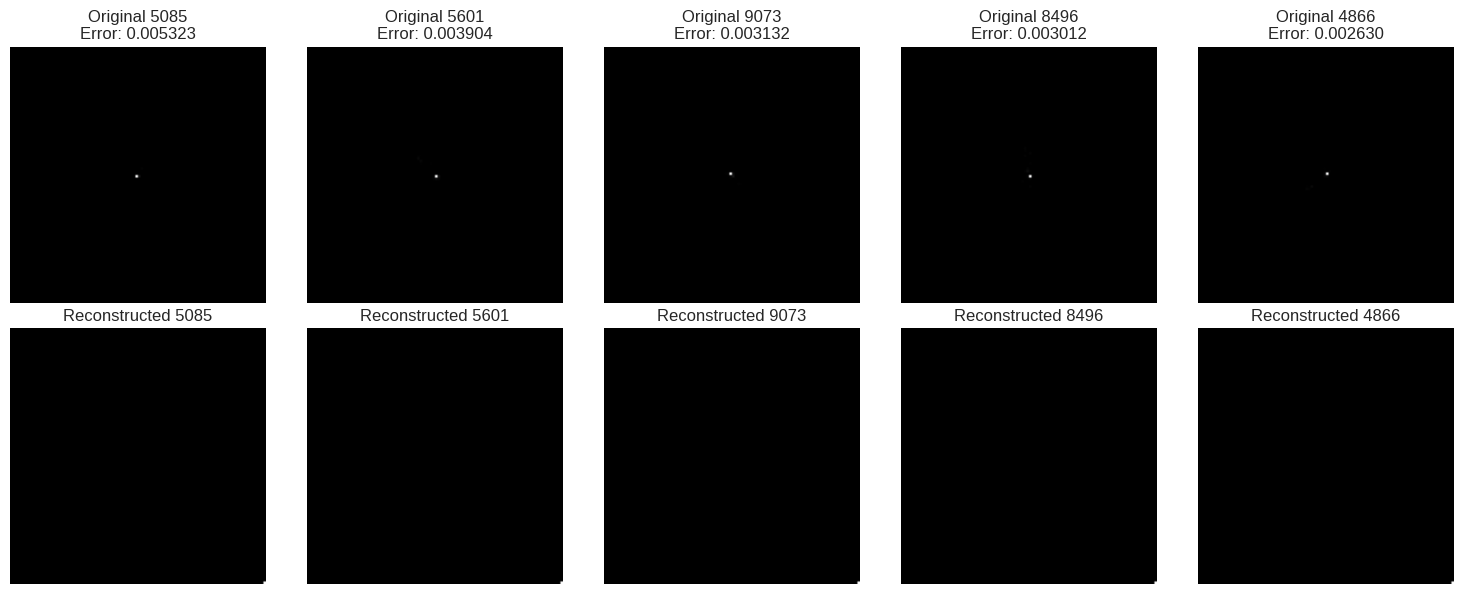


Total number of anomalies detected (using threshold 0.001048): 408


In [ ]:
# 1. Find the indices of the top 5 jets with the highest reconstruction errors.
top_5_anomaly_indices = np.argsort(reconstruction_errors)[-5:][::-1]

print("Indices of top 5 jets with highest reconstruction errors:", top_5_anomaly_indices)

# 2. Visualise the original and reconstructed images for these top 5 jets.
plt.figure(figsize=(15, 6))

for i, idx in enumerate(top_5_anomaly_indices):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(val_jet_images_reshaped[idx].squeeze(), cmap='gray')
    plt.title(f"Original {idx}\nError: {reconstruction_errors[idx]:.6f}")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[idx].squeeze(), cmap='gray')
    plt.title(f"Reconstructed {idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 3. Print the total number of anomalies detected based on the proposed threshold.
num_anomalies = np.sum(reconstruction_errors > anomaly_threshold)
print(f"\nTotal number of anomalies detected (using threshold {anomaly_threshold:.6f}): {num_anomalies}")